## Лабораторная работа 3
### Муминов Андрей 20-ИВТ-3
### Вариант 38

Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Классификаторы:
* Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
* Линейный классификатор (персептрон)

### Набор данных

Эксперименты проводились с группой из 30 добровольцев в возрасте от 19 до 48 лет. Каждый человек выполнял шесть действий (ХОДЬБА, ХОДЬБА ВВЕРХ ПО ЛЕСТНИЦЕ, ХОДЬБА ВНИЗ ПО ЛЕСТНИЦЕ, СИДЕНИЕ, СТОЯНИЕ, ЛЕЖАНИЕ), нося смартфон (Samsung Galaxy S II) на поясе. Используя встроенный акселерометр и гироскоп, мы зафиксировали 3-осевое линейное ускорение и 3-осевую угловую скорость с постоянной частотой 50 Гц. Эксперименты были записаны на видео, чтобы маркировать данные вручную. Полученный набор данных был случайным образом разделен на два набора, где 70% добровольцев были выбраны для генерации обучающих данных и 30% тестовых данных.Сигналы датчиков (акселерометра и гироскопа) предварительно обрабатывались с применением шумовых фильтров, а затем отбирались в скользящих окнах фиксированной ширины с перекрытием 2,56 с и 50% (128 показаний/окно). Сигнал ускорения датчика, который имеет компоненты гравитации и движения тела, был разделен с помощью фильтра нижних частот Баттерворта на ускорение тела и гравитацию. Предполагается, что гравитационная сила имеет только низкочастотные составляющие, поэтому использовался фильтр с частотой среза 0,3 Гц. Из каждого окна был получен вектор признаков путем вычисления переменных из временной и частотной областей. Смотри features_info.txt-для более подробной информации.

'train/X_train.txt': Тренировочный набор.

'train/y_train.txt': Тренировочные метки.

'test/X_test.txt': Тестовый набор.

'test/y_test.txt': Тестовые метки.

Следующие файлы доступны для данных обучения и тестирования. Их описания эквивалентны.

'train/subject_train.txt': Каждая строка идентифицирует субъекта, который выполнил действие для каждого образца окна. Его диапазон составляет от 1 до 30.

'train/Inertial Signals/total_acc_x_train.txt': Сигнал ускорения от акселерометра смартфона по оси X в стандартных гравитационных единицах 'g'. Каждая строка показывает вектор из 128 элементов. То же самое описание относится и к 'total_acc_x_train.txt-и ...total_acc_z_train.txt-файлы для осей Y и Z.

'train/Inertial Signals/body_acc_x_train.txt': Сигнал ускорения тела, полученный путем вычитания силы тяжести из общего ускорения.

'train/Inertial Signals/body_gyro_x_train.txt': Вектор угловой скорости, измеренный гироскопом для каждого образца окна. Единицы измерения-радианы в секунду.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [3]:
x_test = pd.read_csv('X_test.txt', header=None, delimiter=r"\s+")
y_test = pd.read_csv('y_test.txt')
y_train = pd.read_csv('y_train.txt')
x_train = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
y_test.columns = ['Class']
y_train.columns = ['Class']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(7351, 561)
(7351, 1)
(2946, 561)
(2946, 1)


Удаление дупликатов

In [4]:
x_test.drop_duplicates(keep = 'first', inplace = True)
x_train.drop_duplicates(keep = 'first', inplace = True)
print(x_train.shape)
print(x_test.shape)

(7351, 561)
(2946, 561)


Оценка сбалансированности по классам

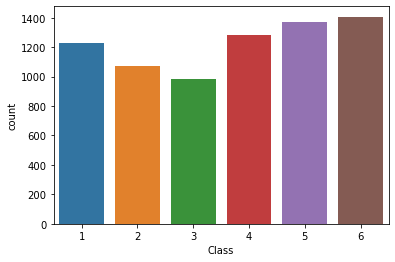

In [5]:
sns.countplot(data=y_train, x='Class')
plt.show()


Масштабирование количественных признаков

<AxesSubplot:>

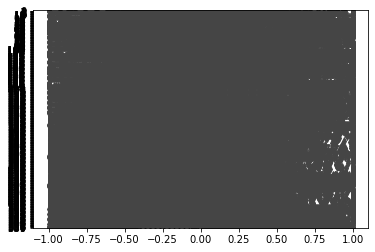

In [6]:
sns.boxplot(data = x_train, orient = 'h')

Данные отмасштабированы создателями датасета.

Оценка корреляции

<AxesSubplot:>

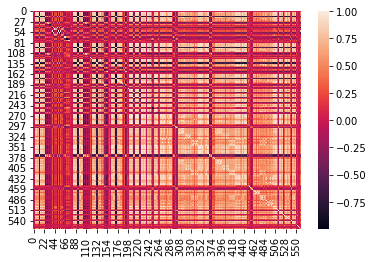

In [7]:
corr = x_train.corr()
sns.heatmap(data = corr)

Пропущенные значения в данных

In [8]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64


In [25]:
a = x_train.isnull().sum()
b = x_test.isnull().sum()
print(a.sum())
print(b.sum())

0
0


Выполнение поставленной задачи классификации

Классификатор K ближайших соседей, задаётся радиус для выбора ближайших объектов

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron

In [11]:
import warnings

warnings.simplefilter('default')

clf = RadiusNeighborsClassifier()

param_grid = {'radius' : np.arange(9,11,1)}

grid = GridSearchCV(clf, param_grid = param_grid, n_jobs = -1)
grid.fit(x_train, y_train.values.ravel())

best_radius = grid.best_estimator_.radius



C:\Games\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


In [12]:
clf = RadiusNeighborsClassifier(radius = best_radius)

clf.fit(x_train, y_train.values.ravel())


RadiusNeighborsClassifier(radius=9)

In [13]:
prediction = clf.predict(x_test)
print('Accuracy:', accuracy_score(prediction,y_test.values.ravel()))
prediction

Accuracy: 0.38560760353021045


array([6, 6, 6, ..., 1, 1, 1], dtype=int64)

In [14]:
prc = Perceptron()

warnings.simplefilter('ignore')

params = {'max_iter' : np.arange(20,30)}

grid = GridSearchCV(prc, params)
grid.fit(x_train, y_train.values.ravel())


GridSearchCV(estimator=Perceptron(),
             param_grid={'max_iter': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [15]:
best_max_iter = grid.best_estimator_.max_iter
best_max_iter

23

In [16]:

prc = Perceptron(max_iter = best_max_iter)

prc.fit(x_train, y_train.values.ravel())

prediction = prc.predict(x_test)
print('Acc', accuracy_score(prediction,y_test.values.ravel()))

prediction

Acc 0.8655804480651731


array([5, 4, 5, ..., 2, 2, 2], dtype=int64)

Кривые

In [17]:
from sklearn.calibration import CalibratedClassifierCV

n_classes = 6

calibrated_prc = CalibratedClassifierCV(prc)
calibrated_prc.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=Perceptron(max_iter=23))

In [18]:
prob_prc = calibrated_prc.predict_proba(x_test)
prob_prc

array([[1.22048429e-04, 2.36661720e-02, 4.96636992e-03, 5.86746463e-03,
        9.60898371e-01, 4.47957430e-03],
       [4.08097868e-04, 1.54519243e-03, 3.97052757e-05, 4.15509503e-01,
        5.81785400e-01, 7.12101584e-04],
       [3.59233959e-04, 1.07736847e-04, 5.01584872e-05, 9.89245279e-02,
        8.97818998e-01, 2.73934455e-03],
       ...,
       [2.56324711e-02, 8.85197647e-01, 7.24263906e-02, 5.17159218e-04,
        1.47949933e-02, 1.43133911e-03],
       [3.55803482e-02, 8.92064137e-01, 3.32392403e-02, 2.53750832e-03,
        3.47306837e-02, 1.84808245e-03],
       [1.14752392e-01, 7.70275726e-01, 7.08844289e-02, 1.88877361e-02,
        2.28597892e-02, 2.33992793e-03]])

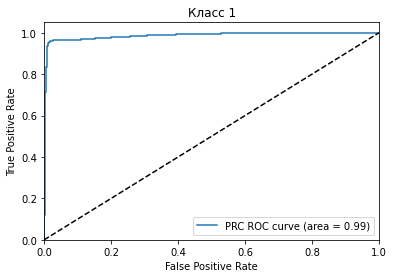

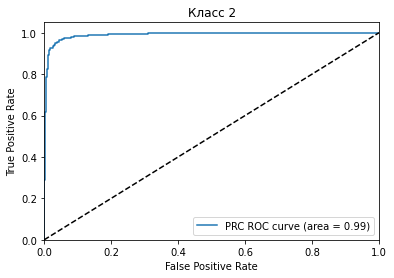

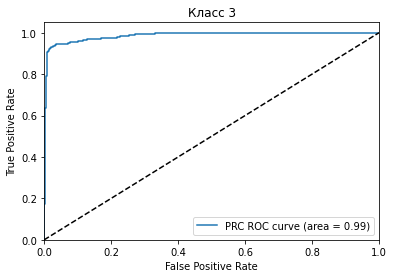

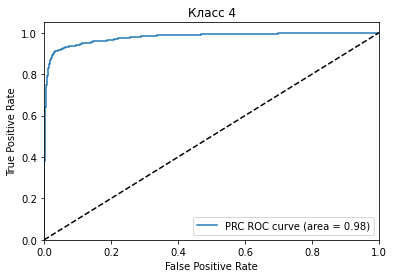

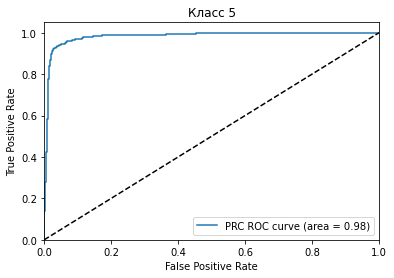

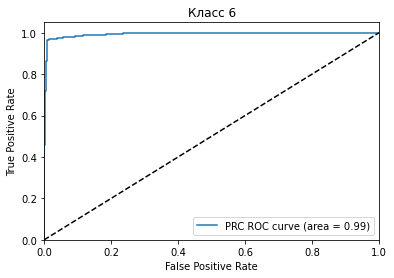

In [19]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
y_train = label_binarize(y_train, classes = [*range(1,n_classes+1)])
y_test = label_binarize(y_test, classes = [*range(1,n_classes+1)])

prc_fpr = dict()
prc_tpr = dict()
prc_roc_auc = dict()

for i in range(n_classes):
    prc_fpr[i], prc_tpr[i], _ = roc_curve(y_test[:, i], prob_prc[:, i])
    prc_roc_auc[i] = auc(prc_fpr[i], prc_tpr[i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(prc_fpr[i], prc_tpr[i], label='PRC ROC curve (area = %0.2f)' % prc_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

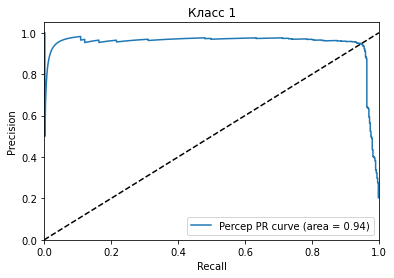

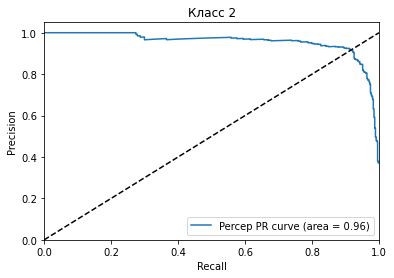

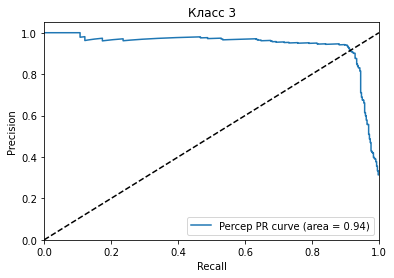

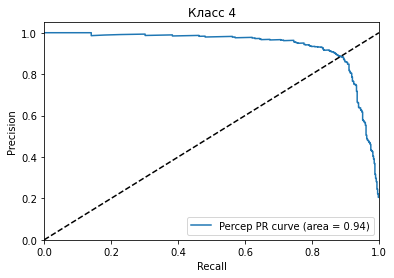

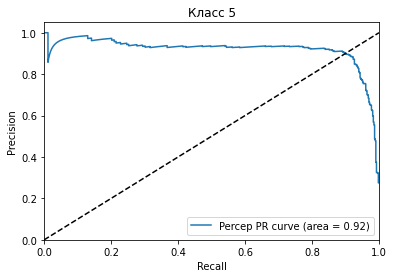

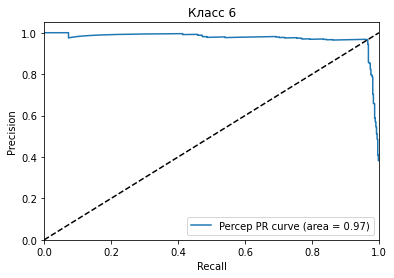

In [20]:
prc_recall = dict()
prc_precision = dict()
prc_pr_aps = dict()

for i in range(n_classes):
    prc_precision[i], prc_recall[i], _ = precision_recall_curve(y_test[:, i], prob_prc[:, i])
    prc_pr_aps[i] = average_precision_score(y_test[:, i], prob_prc[:, i])


# Plot of a RP curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(prc_recall[i], prc_precision[i], label='Percep PR curve (area = %0.2f)' % prc_pr_aps[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

clff = OneVsRestClassifier(clf)

clff.fit(x_train, y_train)

prob_knn = clff.predict_proba(x_test)
y_test.shape

(2946, 6)

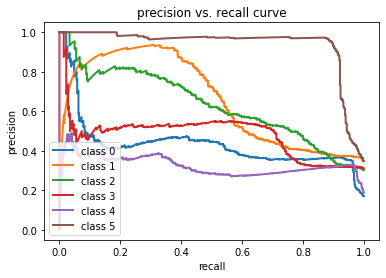

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prob_knn[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

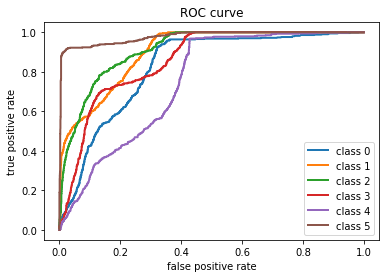

In [23]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  prob_knn[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()